In [36]:
import numpy as np 
import pandas as pd
import networkx as nx 
import torch
import matplotlib.pyplot as plt
from bisect import bisect_left
import random
from cdlib import algorithms
from gensim.models.word2vec import Word2Vec
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from node2vec import Node2Vec

## Task 0 - Create Graphs

### Extract data from the txt files


In [4]:
path = "Cit-HepPh.txt"
path2 = "cit-HepPh-dates.txt"
data = []
with open(path, "r") as file:
    for line in file:
        values = line.strip().split()
        values[0]=int(values[0])
        values[1]=int(values[1])
        data.append(values)

data = sorted(data, key=lambda x: (x[0], x[1]))
print(len(data))
print(data[0:100])
# data is sorted

# ERROR->
check_array = np.zeros(len(data))
###########

date_published = {}
with open(path2, "r") as file:
    for line in file:
        values = line.strip().split()
        values[0]=int(values[0])
        date_published[values[0]]=values[1]

date_published = dict(sorted(date_published.items(), key=lambda item: (item[1][0:4], item[1][5:7], item[1][8:10])))
# date_published = dict(sorted(date_published.items(), key=lambda item: item[0]))
        
print(date_published)
print(len(date_published))
# date_published dictionary is sorted on the basis of the dates the papers are published


421578
[[1001, 9212308], [1001, 9305239], [1001, 9306240], [1001, 9312276], [1001, 9312333], [1001, 9401294], [1001, 9403226], [1001, 9409265], [1001, 9511336], [1001, 9601359], [1001, 9602280], [1001, 9610553], [1001, 9701390], [1001, 9702424], [1001, 9708239], [1001, 9709423], [1001, 9710255], [1001, 9802439], [1001, 9810389], [1001, 9810409], [1001, 9903515], [1001, 9903516], [1001, 9905323], [1001, 9907385], [1001, 9907523], [1001, 9908523], [1001, 9909506], [1001, 9910563], [1001, 9912251], [1002, 9303309], [1002, 9307201], [1002, 9401219], [1002, 9407389], [1002, 9409375], [1002, 9503443], [1002, 9504316], [1002, 9508343], [1002, 9606211], [1002, 9606386], [1002, 9609331], [1002, 9803277], [1002, 9807423], [1002, 9808299], [1002, 9808312], [1002, 9811308], [1002, 9812320], [1002, 9812472], [1002, 9902371], [1002, 9902443], [1002, 9903404], [1002, 9907422], [1002, 9909540], [1002, 9912236], [1002, 9912463], [1002, 9912516], [1003, 9311243], [1003, 9405410], [1003, 9503208], [1003,

### Creating graphs from extracted data
- We create an array of graphs in which the i<sup>th</sup> graph holds all the data about the citation network from 1992 till the year **1992 + i**
- This helps us analyze how the graph is changing over the years
  
**Method**  
We add papers as nodes to the graph on the basis of the date they were published.  
After adding a paper to the network, we draw all those edges which originate from that node to other nodes (the papers the current paper has cited)

In [5]:
# Create graph year by year
G = nx.DiGraph()

G_array = []
iterator = iter(date_published.items())

# def fn(arr):
#     for ele in arr:
#         print(ele.number_of_nodes(), end=" ")
#     print()
#     for ele in arr:
#         print(ele.number_of_edges(), end=" ")
#     print()

prev_year_and_month = "-1"
curr_year_and_month = "1992-02"
x_time = []

for node, date in iterator:
    # adds a graph instance to the graph array
    curr_year_and_month = date[0:7]
    if curr_year_and_month !=prev_year_and_month:
        if prev_year_and_month!="-1":
            x_time.append(curr_year_and_month)
            print(f"Current year and month = {curr_year_and_month}")
            print(f"previous year and month = {prev_year_and_month}")
            print(f"number of nodes in G = {G.number_of_nodes()}")
            print(f"Number of edges in G = {G.number_of_edges()}")
            G_array.append(G.copy())
            print(f"size of G_array = {len(G_array)}")
            print()
    prev_year_and_month = curr_year_and_month

    # creates the next graph instance
    G.add_node(node)
    ind = bisect_left(data, [node, float('-inf')])
    for i in range(ind, len(data)):
        if data[i][0] != node:
            break
        G.add_edges_from([data[i]])
        check_array[i]=1

x_time.append(curr_year_and_month)
print(f"Current year and month = {curr_year_and_month}")
print(f"previous year and month = {prev_year_and_month}")
print(f"number of nodes in G = {G.number_of_nodes()}")
print(f"Number of edges in G = {G.number_of_edges()}")
G_array.append(G.copy())
print(f"size of G_array = {len(G_array)}")
print()

Current year and month = 1992-03
previous year and month = 1992-02
number of nodes in G = 2
Number of edges in G = 0
size of G_array = 1

Current year and month = 1992-04
previous year and month = 1992-03
number of nodes in G = 31
Number of edges in G = 3
size of G_array = 2

Current year and month = 1992-05
previous year and month = 1992-04
number of nodes in G = 72
Number of edges in G = 4
size of G_array = 3

Current year and month = 1992-06
previous year and month = 1992-05
number of nodes in G = 125
Number of edges in G = 7
size of G_array = 4

Current year and month = 1992-07
previous year and month = 1992-06
number of nodes in G = 202
Number of edges in G = 12
size of G_array = 5

Current year and month = 1992-08
previous year and month = 1992-07
number of nodes in G = 292
Number of edges in G = 25
size of G_array = 6

Current year and month = 1992-09
previous year and month = 1992-08
number of nodes in G = 364
Number of edges in G = 32
size of G_array = 7

Current year and mont

### Note: Some datapoints have been excluded

In [14]:
count=0
cat1 = set()
cat2 = set()
for i , check_val in enumerate(check_array):
    if check_val == 0:
        cat1.add(data[i][0])
        cat2.add(data[i][1])
        count+=1
print(f"count = {count}")
print(cat1)
print(cat2)
print(len(cat1))
# THE NODES IN THE SET cat1 ARE NOT PRESENT IN THE DATES.TXT FILE
# THEY ARE ONLY PRESENT IN THE EDGES.TXT FILE
# SO, THESE PAPERS ARE NOT BEING ADDED TO OUR GRAPH, AND NEITHER ARE THE EDGES ORIGINATING FROM THESE PAPERS

count = 74164
{301222, 301223, 301224, 301225, 211336, 301226, 301227, 301228, 301229, 301230, 211337, 212314, 301231, 301233, 301234, 301235, 211338, 212315, 301236, 301237, 301238, 301239, 301240, 211339, 212316, 301241, 302122, 301242, 301243, 301244, 301245, 212317, 301246, 301247, 301248, 301249, 301250, 211341, 212318, 301252, 301253, 301254, 301255, 211342, 212319, 301256, 301257, 301258, 301260, 211343, 301261, 205001, 205003, 205004, 205005, 212320, 205007, 205008, 205009, 205010, 205011, 205012, 205013, 205014, 205015, 205016, 205017, 301263, 205019, 205020, 205021, 205022, 205023, 205024, 205025, 205026, 205027, 205028, 205029, 205030, 205031, 205032, 205033, 205034, 205035, 205036, 205037, 205038, 205039, 205040, 205041, 205042, 205043, 205044, 205045, 205046, 205047, 205048, 205049, 205050, 205051, 205052, 205053, 205054, 205055, 205056, 205057, 205058, 205059, 205060, 205061, 205062, 205063, 205064, 205065, 205066, 205067, 205068, 205069, 205070, 205071, 205072, 205073, 2

## Task 1 - Temporal Properties

### Property 1 - Analyzing the number of papers and number of citations

#### Plotting how the number of papers and number of citation change with time

122
122


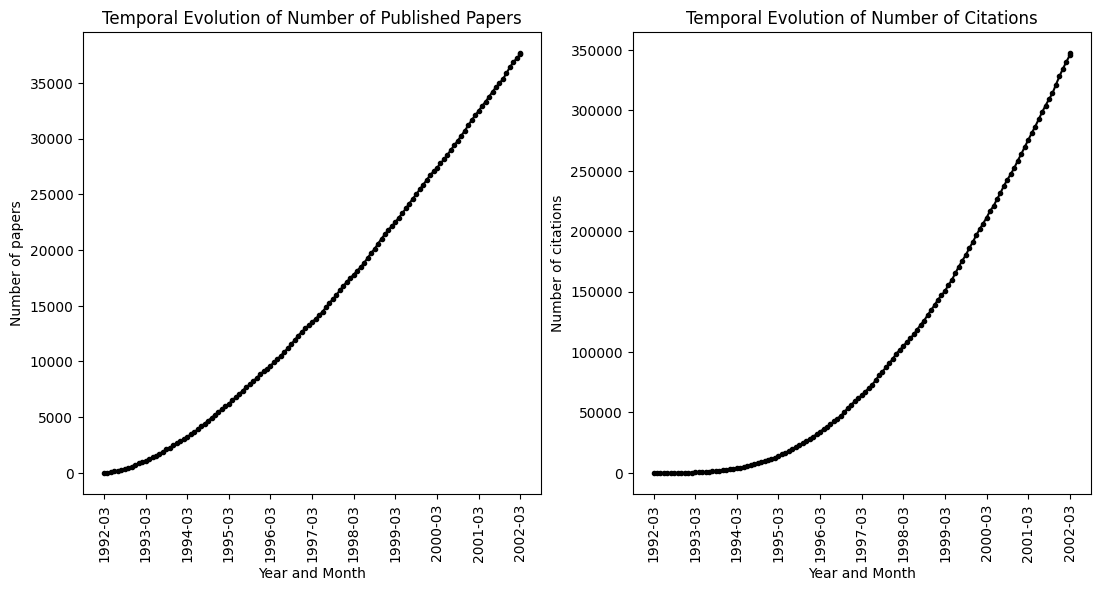

In [114]:
y_nodes = []
y_edges = []

for i, G in  enumerate(G_array):
    # print(f"num nodes = {G.number_of_nodes()}")
    y_nodes.append(G.number_of_nodes())
    y_edges.append(G.number_of_edges())

print(len(x_time))
print(len(y_nodes))

every_12th_time = x_time[::12] # used to get a clear labelling for the x-axis, otherwise the dates overlap
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.plot(x_time, y_nodes, linestyle="-", marker=".", label="number of papers", color="black")
plt.xticks(every_12th_time, every_12th_time, rotation=90)
plt.xlabel("Year and Month")
plt.ylabel("Number of papers")
plt.title("Temporal Evolution of Number of Published Papers")

plt.subplot(122)
plt.plot(x_time, y_edges, marker=".", label="number of citations", color="black")
plt.xticks(every_12th_time, every_12th_time, rotation=90)
plt.xlabel("Year and Month")
plt.ylabel("Number of citations")
plt.title("Temporal Evolution of Number of Citations")
plt.show()

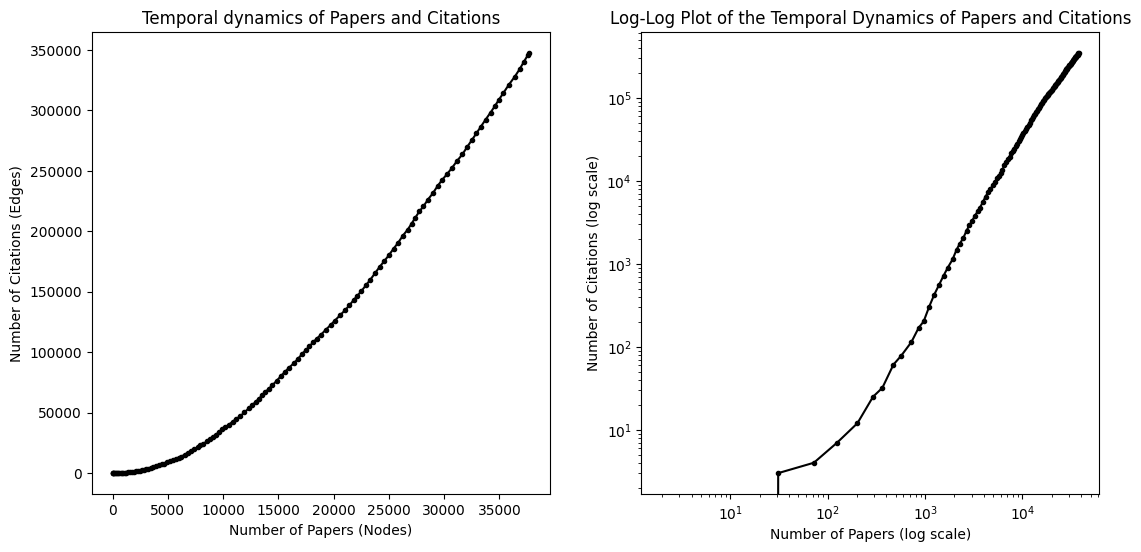

In [119]:
y_arr = []
for i, G in enumerate(G_array):
    y_arr.append(y_edges[i]/float(y_nodes[i]))

plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.plot(y_nodes, y_edges, marker=".", color="black")
plt.xlabel("Number of Papers (Nodes)")
plt.ylabel("Number of Citations (Edges)")
plt.title("Temporal dynamics of Papers and Citations")

plt.subplot(122)
plt.loglog(y_nodes, y_edges, marker=".", color="black")
plt.xlabel('Number of Papers (log scale)')
plt.ylabel('Number of Citations (log scale)')
plt.title('Log-Log Plot of the Temporal Dynamics of Papers and Citations')
plt.show()

# DO SOME THINGS WITH THIS DATA
# CAN TRY OUT POLYNOMIAL REGRESSION ON IT

### Property 2 - Plotting the Indegrees and the Outdegrees in the graphs
The plots show the pareto-like fat-tailed distribution. 
In every row, 
1. The first plot shows how a small number of papers are cited a very high number of times, while most of the papers barely get cited.
2. The second plot shows how a small number of papers cited a lot of other papers, while most of the papers did not site many papers.

Some examples of Pareto Distribution are displayed below:

<img src="./images/pareto_distribution.png" alt="Graph Showing Pareto Distribution" width="300px" height="300px">
<img src="./images/pareto_distribution2.png" alt="Graph Showing Pareto Distribution" width="300px" height="300px">

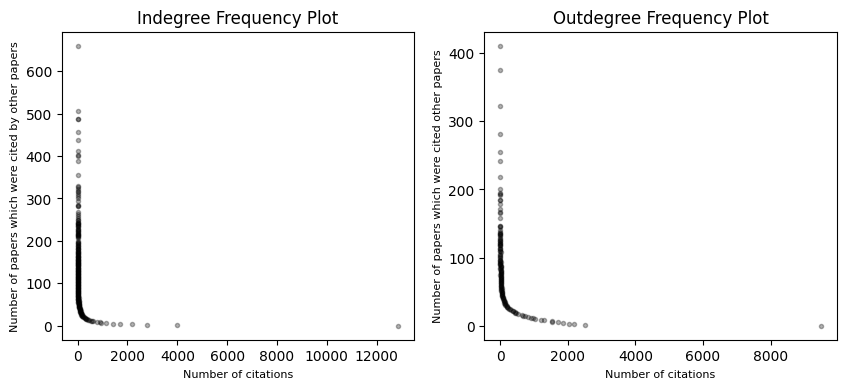

In [112]:
def plot_graph_degrees(G):
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())

    in_degrees = dict(sorted(in_degrees.items(), key=lambda item: -item[1]))
    out_degrees = dict(sorted(out_degrees.items(), key = lambda item: -item[1]))

    def plot_function(arr, xlabel, ylabel):
        d = {}
        for e in arr:
            if e not in d:
                d[e]=1
            else:
                d[e]+=1
        x = np.array(list(d.values()))
        y = np.array(list(d.keys()))

        # messing around
        # index_of_max = np.argmax(x)
        # x = np.delete(x, index_of_max)
        # y = np.delete(y, index_of_max)
        ####
        
        plt.scatter(x=x,y=y, marker=".", alpha=0.3, color="black")
        xlab = plt.xlabel(xlabel=xlabel)
        xlab.set_fontsize(8)
        ylab = plt.ylabel(ylabel=ylabel)
        ylab.set_fontsize(8)


    in_degrees_values = np.array(list(in_degrees.values()))
    out_degrees_values = np.array(list(out_degrees.values()))

    plt.figure(figsize=(10, 4)) 
    plt.subplot(1, 2, 1) 
    plot_function(in_degrees_values, xlabel="Number of citations", ylabel="Number of papers which were cited by other papers")
    plt.title("Indegree Frequency Plot")

    plt.subplot(1, 2, 2) 
    plot_function(out_degrees_values, xlabel="Number of citations", ylabel="Number of papers which were cited other papers")
    plt.title("Outdegree Frequency Plot")
    plt.show()


plot_graph_degrees(G)

### Property 3 - Density of the Graph

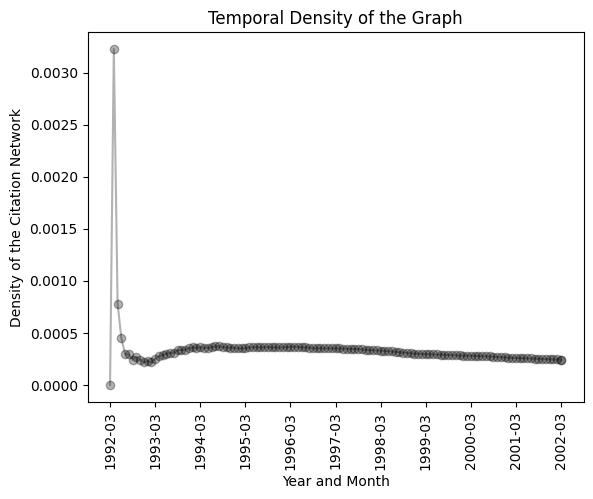

In [110]:
density_array = []
for digraph in G_array:
    density = nx.density(digraph)
    density_array.append(density)

plt.plot(x_time, density_array, marker="o", color="black", alpha = 0.3)
plt.xlabel("Year and Month")
plt.xticks(every_12th_time, every_12th_time, rotation=90)
plt.ylabel("Density of the Citation Network")
plt.title("Temporal Density of the Graph")
plt.show()

### Property 4 - Average Clustering Coefficient

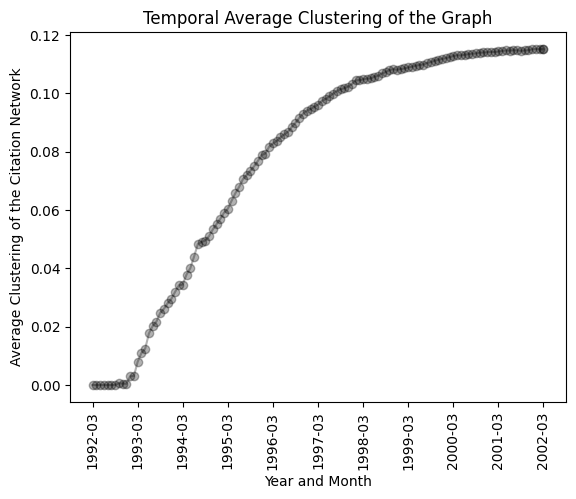

In [111]:
# TAKES 2 MINUTES TO RUN
# TIME COMPLEXITY = O(V*E)
average_clustering_array = []
for i, digraph in enumerate(G_array):
    average_clustering = nx.average_clustering(digraph)
    average_clustering_array.append(average_clustering)
    # print(f"{i}th graph has average clustering of: {average_clustering}")

plt.plot(x_time, average_clustering_array, marker="o", color="black", alpha = 0.3)
plt.xlabel("Year and Month")
plt.xticks(every_12th_time, every_12th_time, rotation=90)
plt.ylabel("Average Clustering of the Citation Network")
plt.title("Temporal Average Clustering of the Graph")
plt.show()

### Property 5 - Identifying Citation Bursts

In [129]:
# Relative Growth of Citations used over Absolute Growth
def identify_citation_bursts(G_array, threshold_percentage):
    bursts = []

    for i in range(1, len(G_array)):
        G_current = G_array[i]
        G_previous = G_array[i - 1]

        # Extracting citation data from the graphs
        edges_current = set(G_current.edges())
        edges_previous = set(G_previous.edges())

        # Find newly added citations
        new_citations = edges_current - edges_previous

        # Count new citations per paper
        citation_counts = pd.Series([target for _, target in new_citations]).value_counts()

        # Calculate the percentage increase in citations for each paper
        total_citations_previous = len(edges_previous)
        citation_percentage_increase = citation_counts / total_citations_previous * 100

        # Identify papers with citation bursts based on percentage increase
        papers_with_bursts = citation_percentage_increase[citation_percentage_increase > threshold_percentage].index.tolist()

        # Add information about the time period to the results
        bursts.extend([(paper, i) for paper in papers_with_bursts])

    return bursts


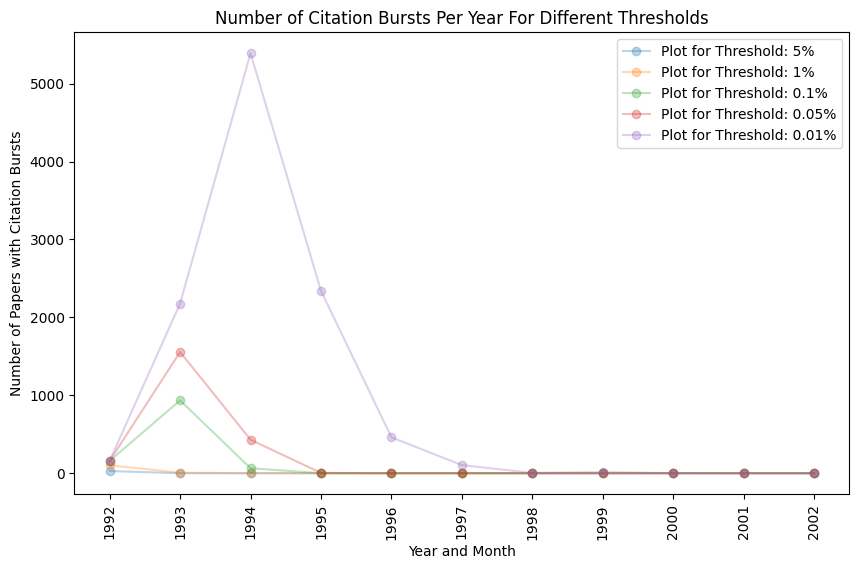

In [136]:
x_years = []
for i in range(1992, 2003):
    x_years.append(i)

def plot_citation_bursts(G_array, threshold_percentage):
    bursts_array = identify_citation_bursts(G_array, threshold_percentage)
    y_bursts = np.zeros(len(x_years))
    for  ele in bursts_array:
        index = int(ele[1]/12)
        y_bursts[index]+=1
    label = f"Plot for Threshold: {threshold_percentage}%"
    plt.plot(x_years, y_bursts, marker="o", alpha=0.3, label=label)



plt.figure(figsize=(10, 6))

plot_citation_bursts(G_array, 5)
plot_citation_bursts(G_array, 1)
plot_citation_bursts(G_array, 0.1)
plot_citation_bursts(G_array, 0.05)
plot_citation_bursts(G_array, 0.01)

plt.xlabel("Year and Month")
plt.ylabel('Number of Papers with Citation Bursts')
plt.title("Number of Citation Bursts Per Year For Different Thresholds")
plt.xticks(x_years, x_years, rotation=90)
plt.legend(loc="upper right")  
plt.show()


### Analysis of the Properties
- The number of nodes increase linearly with time. 
  
- The number of edges increase slightly faster.  

- We can infer the following from the degrees of the graph:<small>  
  1. The plot of the number of nodes with a given indegree or outdegree at any given point in the graph forms a pareto distribution. We observe a departure from the tranquility of a normal distribution.   
  2. The Pareto distribution reveals itself with its fat tail – a testament to the uneven nature of academic impact. While the majority of papers may languish in relative obscurity, a select few bask in the limelight of numerous citations, shaping the landscape of intellectual influence  
  3.  It's not the average paper that propels fields forward, but rather those rare gems that disrupt conventional thinking and spawn intellectual revolutions.

</small>
  
- The density of the graph is initially unstable and increases and decreases very rapidly. However, it stabilizes as the citation network grows in size.
- The plot of the average clustering coefficient of the graph resembles exponential saturation.
- In identifying citation bursts, we use a relative scale over absolute measurements.   
    Here's a simple example to illustrate the point:  

    - Paper A: Initial citations = 1, Final citations = 5 (400% increase)  
    - Paper B: Initial citations = 100, Final citations = 104 (4% increase)  

    We rely on relative increase instead of absolute increase.  

- The citation burst plot clearly shows that the field gets saturated over time:
  - The more famous papers's citation counts stop growing at the same rate as earlier
  - The new papers post 1996 don't get the same level of clout

## Task 2

### Part 1 - Community Detection Algorithms
- Need to implement 2 algorithms

The following algorithms can be used:
1. Louvain (implemented for undirected graphs) (not an ml method)
2. deepwalk (random walk)   
3. node2vec  (bfs + dfs)
4. gcn (better suited for nodes with uniform degrees)
5. graphSAGE (better suited for nodes with non-uniform degrees) (has a random walk based approach as well)


#### Method 1 - Louvain Method

In [8]:
louvain_coms = algorithms.louvain(G.to_undirected(),weight="weight" ,resolution=1, randomize=False)
communities = louvain_coms.communities
print(type(communities[0]))
len(communities)

7200

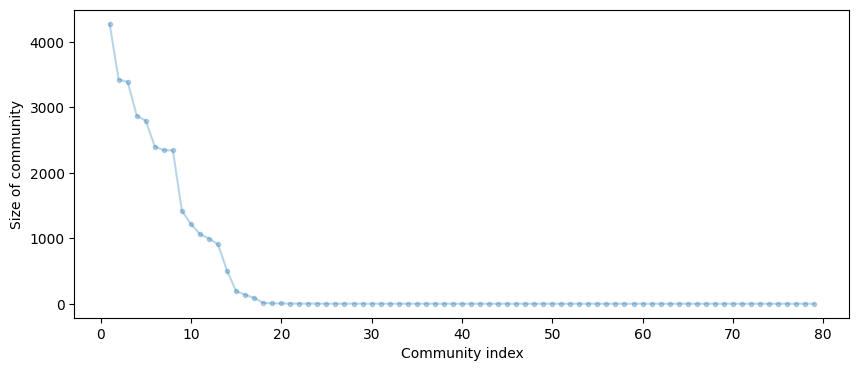

In [10]:
# for i, community in enumerate(communities):
#     print(f"{i+1}th community with size -> {len(community)}")

def plot_community_sizes(communities):
    x = []
    y = []
    for i, community in enumerate(communities):
        if len(community) > 1: # only plot communities with 2 or members
            y.append(len(community))
            x.append(i+1)
    
    plt.figure(figsize=(10, 4))
    plt.plot(x, y, marker=".", alpha=0.3)
    plt.xlabel("Community index")
    plt.ylabel("Size of community")
    plt.show()

plot_community_sizes(communities)


#### Method 2 - DeepWalk

In [16]:
def random_walk(start, length):
    walk = [str(start)]

    for i in range(length):
        neighbours = [node for node in G.neighbors(start)]
        if not neighbours:
            break
        next_node = np.random.choice(neighbours, 1)[0]
        walk.append(str(next_node))
        start = next_node

    return walk

walks = []
for node in G.nodes:
    # 80 random walks of length 10 for every node
    for _ in range(80):
        walks.append(random_walk(node, 10))


In [27]:
model = Word2Vec(walks,
                 hs=1,
                 sg=1,
                 vector_size=100,
                 window=10,
                 workers=1,
                 seed=1)

print(f"shape of embedding matrix: {model.wv.vectors.shape}")

# Retrieve node embeddings
node_embeddings = {str(node): model.wv[str(node)] for node in G.nodes}


# model.build_vocab(walks)

# model.train(walks, total_examples=model.corpus_count, epochs=30, report_delay=1)

shape of embedding matrix: (37686, 100)


In [32]:
print(len(node_embeddings))
print(type(node_embeddings))

# Extract node features for clustering
X = np.array(list(node_embeddings.values()))

# Choose the number of clusters (you can adjust this based on your data)
num_clusters = 50

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)

# Assign cluster labels to nodes
cluster_labels = kmeans.labels_

# Create a dictionary mapping nodes to their cluster labels
node_cluster_mapping = dict(zip(G.nodes, cluster_labels))

# # Print the cluster assignments for each node
# for node, cluster_label in node_cluster_mapping.items():
#     print(f"Node {node} belongs to Cluster {cluster_label}")

37686
<class 'dict'>


In [36]:
# THIS WILL TAKE FOREVER
# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=10, random_state=42)
node_embeddings_2d = tsne.fit_transform(X)

# Plot the node embeddings
plt.figure(figsize=(10, 8))
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], alpha=0.7)

# Annotate points with node labels (optional)
for i, node in enumerate(G.nodes):
    plt.annotate(node, (node_embeddings_2d[i, 0], node_embeddings_2d[i, 1]))

plt.title('t-SNE Visualization of Node Embeddings')
plt.show()

#### Method 3 - Node2Vec

In [40]:
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=1)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# # Save the model if needed
# model.save("node2vec_model.model")

# Retrieve node embeddings
node_embeddings = {str(node): model.wv[str(node)] for node in G.nodes}

In [ ]:

X = np.array(list(node_embeddings.values()))
num_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to nodes
cluster_labels = kmeans.labels_

# Create a dictionary mapping nodes to their cluster labels
node_cluster_mapping = dict(zip(G.nodes, cluster_labels))

# Print the cluster assignments for each node
for node, cluster_label in node_cluster_mapping.items():
    print(f"Node {node} belongs to Cluster {cluster_label}")

#### Method 4 - Graph Convolutional Network

#### Method 5 - GraphSAGE

### Part 2 - Analyzing the Communities

### Part 3 - Temporal Community Detection

## Task 3

### Link Prediction Algorithms
The following algorithms have been used for link prediction:  
- Node2Vec
- GraphSAGE

We have to implement one GNN method. Either GCN or GraphSAGE can be implemented.

However, if you have a graph with unevenly distributed node degrees and significant variability, GraphSAGE might be a more suitable choice for link prediction. It inherently samples neighborhoods during training, allowing it to handle nodes with different degrees more effectively.

### Comparing the Predictions